In [1]:
!pip install matplotlib

In [2]:
!pip install numpy

In [3]:
!pip install pandas

In [4]:
!pip install pandas_datareader

In [5]:
!pip install yfinance

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [7]:
start = '2015-01-01'
end = '2025-12-31'
stock = 'GOOG'
df = yf.download(stock, start=start, end=end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  26.378078  26.490770  26.133251  26.168653  26.168653  28951268
2015-01-05  26.091366  26.144720  25.582764  25.623152  25.623152  41196796
2015-01-06  25.679497  25.738087  24.983908  25.029282  25.029282  57998800
2015-01-07  25.280592  25.292759  24.914099  24.986401  24.986401  41301082
2015-01-08  24.831326  25.105074  24.482782  25.065184  25.065184  67071641


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-17,175.550003,177.494995,174.979996,177.289993,177.289993,16546400
2024-05-20,177.309998,179.949997,177.225006,178.460007,178.460007,17495100
2024-05-21,178.399994,179.820007,177.309998,179.539993,179.539993,14706000
2024-05-22,178.399994,178.852005,176.779999,178.000000,178.000000,16189400
2024-05-23,178.699997,179.899994,174.539993,175.059998,175.059998,14903949


In [9]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
1,2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2,2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
3,2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
4,2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [10]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,26.378078,26.490770,26.133251,26.168653,28951268
1,26.091366,26.144720,25.582764,25.623152,41196796
2,25.679497,25.738087,24.983908,25.029282,57998800
3,25.280592,25.292759,24.914099,24.986401,41301082
4,24.831326,25.105074,24.482782,25.065184,67071641


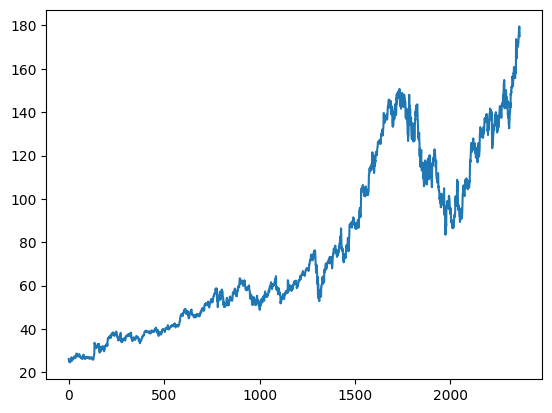

In [11]:
plt.plot(df.Close)

In [12]:
df

,Open,High,Low,Close,Volume
0,26.378078,26.490770,26.133251,26.168653,28951268
1,26.091366,26.144720,25.582764,25.623152,41196796
2,25.679497,25.738087,24.983908,25.029282,57998800
3,25.280592,25.292759,24.914099,24.986401,41301082
4,24.831326,25.105074,24.482782,25.065184,67071641
...,...,...,...,...,...
2359,175.550003,177.494995,174.979996,177.289993,16546400
2360,177.309998,179.949997,177.225006,178.460007,17495100
2361,178.399994,179.820007,177.309998,179.539993,14706000
2362,178.399994,178.852005,176.779999,178.000000,16189400


In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2359    150.917699
2360    151.274099
2361    151.655099
2362    152.022299
2363    152.363599
Name: Close, Length: 2364, dtype: float64

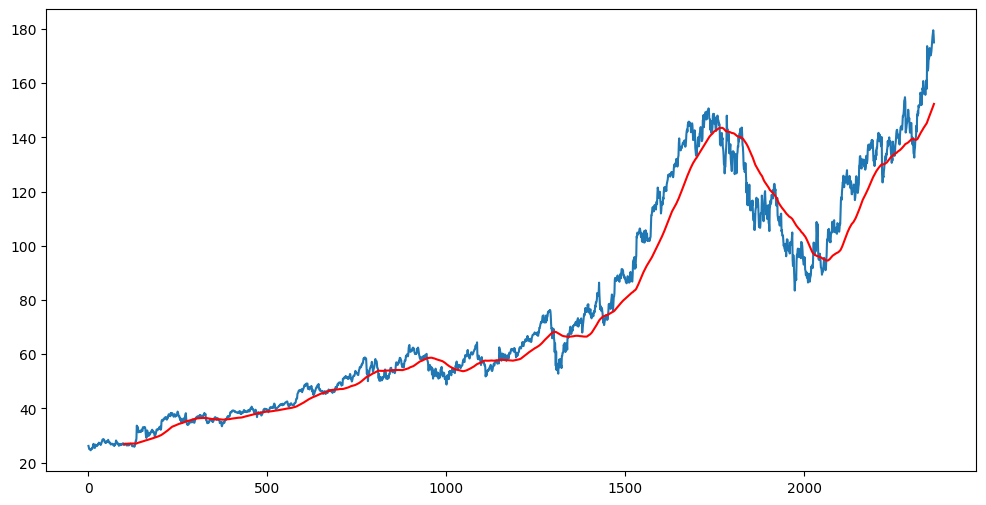

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [15]:
ma200 = df.Close.rolling(100).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2359    150.917699
2360    151.274099
2361    151.655099
2362    152.022299
2363    152.363599
Name: Close, Length: 2364, dtype: float64

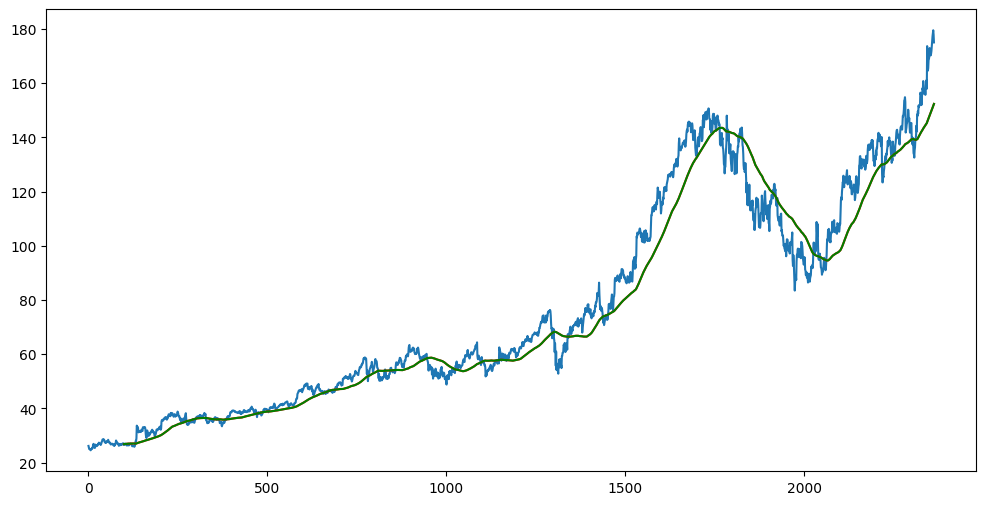

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200,'g')

In [17]:
df.shape

(2364, 5)

In [18]:
#spliiting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1654, 1)
(710, 1)


In [19]:
data_training.head()

,Close
0,26.168653
1,25.623152
2,25.029282
3,24.986401
4,25.065184


In [20]:
data_testing.head()

,Close
1654,136.540497
1655,135.220993
1656,135.989502
1657,136.279999
1658,136.028503


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01397742],
       [0.00923741],
       [0.00407711],
       ...,
       [1.        ],
       [0.97525289],
       [0.9716469 ]])

In [23]:
data_training_array.shape

(1654, 1)

In [24]:
x_train =[]
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(1554, 100, 1)

In [26]:
# ML Model

In [27]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, LSTM,Dropout

In [28]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu' ,  return_sequences=True, 
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu' ,  return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu' ,  return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))          
          

model.add(Dense(units =1))


C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam', loss='mse')

In [31]:
model.fit(x_train,y_train, epochs=50,batch_size=32, verbose=1)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 0.0504
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0085
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0044
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0045
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0032
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0038
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0034
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 0.0037
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0027
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0025
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0034
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0029
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0027
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0028
Epoch 15/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.00

In [32]:
model.save('my_model.keras')

In [33]:
data_testing.head()

,Close
1654,136.540497
1655,135.220993
1656,135.989502
1657,136.279999
1658,136.028503


In [34]:
data_training.tail()

,Close
1649,133.328506
1650,137.815994
1651,139.644501
1652,136.796494
1653,136.381500


In [35]:
past_100_days = data_training.tail(100)

In [36]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [37]:
final_df.head()

,Close
0,101.208504
1,102.635002
2,102.751503
3,105.738503
4,103.096001


In [38]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.1844717 ],
       [0.19932332],
       [0.20053624],
       [0.23163462],
       [0.20412289],
       [0.20650186],
       [0.22005208],
       [0.21930249],
       [0.1907444 ],
       [0.194378  ],
       [0.19197813],
       [0.19945867],
       [0.19534619],
       [0.19498184],
       [0.19039562],
       [0.20101513],
       [0.2008017 ],
       [0.20761589],
       [0.24359709],
       [0.28930244],
       [0.28888606],
       [0.30186366],
       [0.31006774],
       [0.32070799],
       [0.30452374],
       [0.31102037],
       [0.30454972],
       [0.32631966],
       [0.32689229],
       [0.32930772],
       [0.32474239],
       [0.32456534],
       [0.31135874],
       [0.33602294],
       [0.34197815],
       [0.33176477],
       [0.36965645],
       [0.39567416],
       [0.38538262],
       [0.37760024],
       [0.35629886],
       [0.35759502],
       [0.37040605],
       [0.37943264],
       [0.34974497],
       [0.3326185 ],
       [0.29634571],
       [0.308

In [39]:
input_data.shape

(810, 1)

In [40]:
x_test =[]
y_test=[]

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [41]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(710, 100, 1)
(710,)


In [42]:
# making predications
y_predicated= model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [43]:
y_predicated.shape

(710, 1)

In [44]:
y_predicated

array([[0.5180297 ],
       [0.5247086 ],
       [0.5308849 ],
       [0.5363116 ],
       [0.5409584 ],
       [0.5448432 ],
       [0.54816294],
       [0.5511005 ],
       [0.5539044 ],
       [0.55672574],
       [0.5595381 ],
       [0.5623634 ],
       [0.5651827 ],
       [0.5680177 ],
       [0.57060987],
       [0.5726569 ],
       [0.57406807],
       [0.5751085 ],
       [0.57636786],
       [0.5783699 ],
       [0.58137286],
       [0.5852328 ],
       [0.5899379 ],
       [0.5954521 ],
       [0.6015891 ],
       [0.60811377],
       [0.61454546],
       [0.6205767 ],
       [0.62612814],
       [0.63108915],
       [0.6354082 ],
       [0.63865876],
       [0.64086735],
       [0.6422094 ],
       [0.6431633 ],
       [0.64396596],
       [0.6443136 ],
       [0.6436658 ],
       [0.64191055],
       [0.63938606],
       [0.63661647],
       [0.63411987],
       [0.63203704],
       [0.62962306],
       [0.62615466],
       [0.6212135 ],
       [0.61528957],
       [0.608

In [45]:
scaler.scale_

array([0.01041124])

In [46]:
scale_factor = 1/0.01223242
y_predicated = y_predicated*scale_factor
y_test = y_test*scale_factor

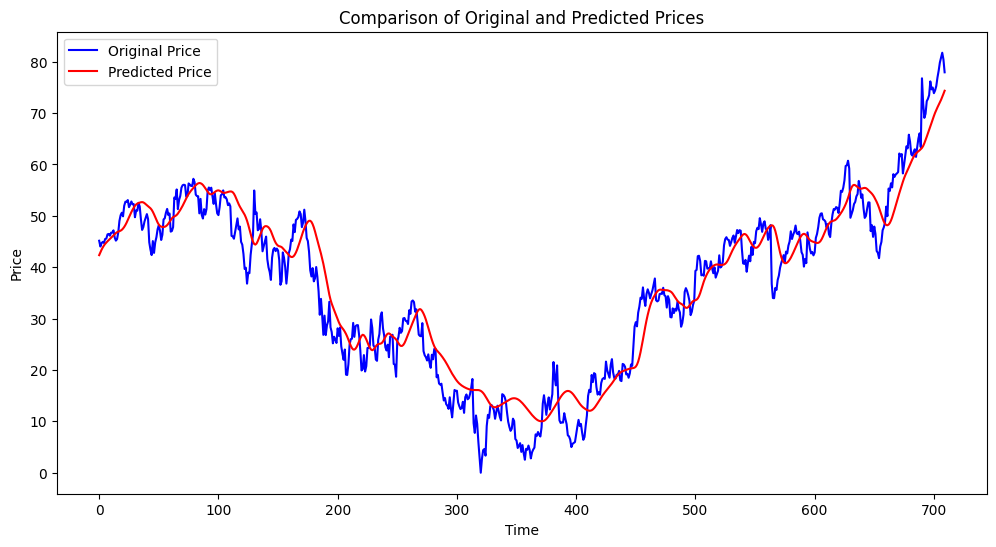

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicated, 'r', label='Predicted Price') 
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Comparison of Original and Predicted Prices')
plt.show()

In [1]:
!pip list


Package                      Version
---------------------------- --------------
absl-py                      2.1.0
aiohttp                      3.9.5
aiosignal                    1.3.1
altair                       5.3.0
annotated-types              0.7.0
anyio                        4.3.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.8.1
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.15.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.8.2
cachetools                   5.3.3
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
